# Using Python for Statistics

In [1]:
# Basic imports
import matplotlib.pyplot as plt
import numpy as np

## Combinations and Permutations - Itertools

In [2]:
# Use the itertools library
import itertools

### Combination: Order Doesn't Matter

In [ ]:
# Here's an example list - pizza toppings!
toppings = ["Mushrooms","Pepperoni","Onion","Peppers","Ham","Pineapple","Sausage","Olives"]

# Use itertools.combinations - arguments are your iterable and number of items
# Need to wrap it in a list to have it render
print(itertools.combinations(toppings, 3))
three_topping_pizzas = list(itertools.combinations(toppings, 3))
print(f"Number of topping options: {len(toppings)}")
print(f"Number of topping combinations: {len(three_topping_pizzas)}")

Number of topping options: 8
Number of topping combinations: 56


### Permutation: Order DOES Matter

In [ ]:
# Here's another example list - numbers 0-9
nums = list(range(10))

# Imagine a padlock with 3 dials, each dial has numbers 0-9
print(itertools.permutations(nums, 3))
# Don't get confused - these are called combination locks, but they're permutations!
combos = list(itertools.permutations(nums, 3))
print(f"Number of number options per dial: {len(nums)}")
print(f"Number of padlock combination options: {len(combos)}")

Number of number options per dial: 10
Number of padlock combination options: 720


## Standard Normal Distribution

![](https://camo.githubusercontent.com/d457367f684c38ac6231b4847e35f2f76c8a9819/68747470733a2f2f6769746875622e636f6d2f6c6561726e2d636f2d73747564656e74732f6473632d302d30392d31322d676175737369616e2d646973747269627574696f6e732d6f6e6c696e652d64732d66742d3033313131392f626c6f622f6d61737465722f6e6f726d616c73642e6a70673f7261773d74727565)

Specifically, let's look at how to visualize this in `matplotlib`:

In [ ]:
# Using the scipy stats library
from scipy import stats

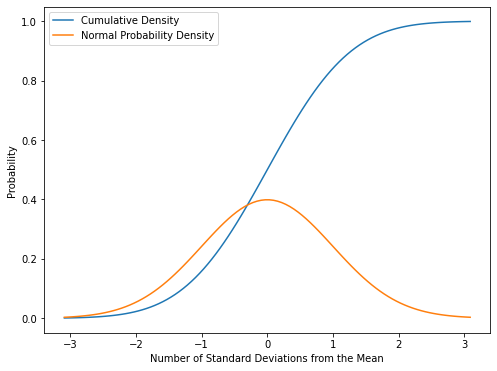

In [ ]:
# Plotting the normal distribution - pdf and cdf
plt.figure(figsize=(8,6))

# Getting our normal distribution PDF,
# as shown in an example in the scipy.stats.norm documentation
# Goes from the points at .1% to 99.9% 
x = np.linspace(stats.norm.ppf(0.001),
                stats.norm.ppf(0.999), 100)

# This plots the cumulative density curve, aka cumulative likelihood
plt.plot(x, stats.norm.cdf(x), label="Cumulative Density")
# This plots the probability density curve, aka our bell curve
plt.plot(x, stats.norm.pdf(x), label="Normal Probability Density")

plt.ylabel('Probability')
plt.xlabel('Number of Standard Deviations from the Mean')
plt.legend()
plt.show()

## Confidence Intervals

Based on the underlying assumption about the distribution:
- Standard normal distribution - use a critical z-value
- Student's T distribution - use a critical t-value

![source: https://courses.lumenlearning.com/wmopen-concepts-statistics/chapter/estimating-a-population-mean-3-of-3/](https://s3-us-west-2.amazonaws.com/courses-images/wp-content/uploads/sites/1729/2017/04/15032548/m10_inference_mean_topic_10_2_m10_est_pop_means_3_image1.png)

In [ ]:
# Example data from the iris dataset
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
example_data = df["sepal width (cm)"] # note that our example is a pandas series

In [ ]:
# First, calculate the confidence interval more manually
n=len(example_data)
samp_mean = example_data.mean()
samp_std = example_data.std()
    
samp_sterr = samp_std / (n ** 0.5)
margin_error = stats.norm.ppf(0.975) * samp_sterr # Using norm because n=150
int_min = samp_mean - margin_error
int_max = samp_mean + margin_error
print(int_min, int_max)

2.987581482110594 3.127085184556074


In [ ]:
# Now calculate the confidence interval using the stats library!
# If using the standard normal distribution
stats.norm.interval(alpha=.95, #confidence level
                    loc=example_data.mean(), #sample mean
                    scale=stats.sem(example_data)) #standard error of the mean

(2.987581482110594, 3.127085184556074)

In [ ]:
# If using a Student's T Distribution:
example_sample = example_data.sample(n=25) # sampling down to 25

stats.t.interval(alpha=.95, #confidence level
                 df=(len(example_sample)-1), #degrees of freedom: sample size - 1
                 loc=example_sample.mean(), #sample mean
                 scale=stats.sem(example_sample)) #standard error of the mean

(2.8824687966587237, 3.2295312033412764)

## Hypothesis Tests

Preparatory Steps:
 
1. Determine the alternate hypothesis
2. Determine the null hypothesis
3. Determine the type of test based on the parameters/statistics you have (z-test, t-test, etc.)
4. Determine the type of test based on the alternate hypothesis (one-tailed right, one-tailed left, or two-tailed)
5. Set a significance threshold

## Types of Hypothesis Tests

### One-Sample Z-Test

For large enough sample sizes (at least $n$ =30), with known population standard deviation, the test statistic of the sample mean $\bar x$ is given by the z-statistic,

$$Z = \frac{\bar{x} - \mu}{\sigma/\sqrt{n}}$$

Where $\bar{x}$ is the sample mean, $\mu$ is the population mean, $\sigma$ is the known population standard deviation, and $n$ is the number of samples.

This hypothesis test tries to answer the question: how likely are we to observe a z-statistic as extreme as our sample's, given the null hypothesis that the sample and the population have the same mean?

In [ ]:
# Let's use the example_data from before 
n = len(example_data) # sample size - which is 150
sigma = .45 # known population standard deviation (would be given)
x_bar = example_data.mean() # sample mean
mu = 3 # known population mean (would be given)

se = sigma/np.sqrt(n) # our denominator is standard error
z = (x_bar - mu)/se 
print(z)

1.5604156879952313


### One-Sample T-Test

For small sample sizes or samples with unknown population standard deviation, the test statistic of the sample mean is given by the t-statistic,

$$ t = \frac{\bar{x} - \mu}{s/\sqrt{n}} $$

Where $\bar{x}$ is the sample mean, $\mu$ is the population mean, $s$ is the sample standard deviation (which is used to estimate the population standard deviation), and $n$ is the number of samples.

This hypothesis test tries to answer the question: how likely are we to observe a t-statistic as extreme as our sample's, given the null hypothesis that the sample and population have the same mean?

In [ ]:
# Let's use a small sample from our example data
example_sample = example_data.sample(25)

# First let's do this more manually
n = len(example_sample) # sample size
s = example_sample.std() # sample standard deviation
x_bar = example_sample.mean() # sample mean
mu = 3 # population mean (would be given)

se = s/np.sqrt(n)
t = (x_bar - mu)/se
print(t)

2.6503566257963245


In [ ]:
# Run in stats library if sample is an array-like variable, and mu is numeric:
stats.ttest_1samp(example_sample, mu)

Ttest_1sampResult(statistic=2.6503566257963196, pvalue=0.014008902203002167)

### Two-Sample T-Tests

Sometimes, we are interested in determining whether two population means are equal. In this case, we use two-sample t-tests.

This hypothesis test tries to answer the question: how likely are we to observe a t-statistic as extreme as our samples', given the null hypothesis that the two samples have the same mean?

There are two types of two-sample t-tests: **paired** and **independent** (unpaired) tests.

**Paired tests:** How is a sample affected by a certain treatment? The individuals in the sample remain the same and you compare how they change after treatment.

In [ ]:
# For this example, let's generate some data:
rng = np.random.default_rng() # Creating a random number generator
paired_1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
paired_2 = (stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
            + stats.norm.rvs(scale=0.2, size=500, random_state=rng))

In [ ]:
# Run in stats library if paired samples are array-like variables:
stats.ttest_rel(paired_1, paired_2)

Ttest_relResult(statistic=2.116310482141235, pvalue=0.03481291536305325)

**Independent tests:** When we compare two different, unrelated samples to each other, we use an independent (or unpaired) two-sample t-test.

In [ ]:
# Grabbing two example samples from the iris dataset
ind_1 = df[df['target']==0]['petal length (cm)']
ind_2 = df[df['target']==1]['petal length (cm)']
# Note that these are both pandas series objects

In [ ]:
# Run in stats library if independent samples are array-like variables:
stats.ttest_ind(ind_1, ind_2)

Ttest_indResult(statistic=-39.492719391538095, pvalue=5.404910513441677e-62)

### ANOVA - Analysis of Variance

Comparing the variance between groups and within groups (more than two). This is done by comparing the individuals with the group means and the overall mean. This generalizes a two-sample t-test beyond just two!

Only going to showcase one-way tests.

In [ ]:
# Grabbing three example samples from the iris dataset
anova_1 = df[df['target']==0]['petal width (cm)']
anova_2 = df[df['target']==1]['petal width (cm)']
anova_3 = df[df['target']==2]['petal width (cm)']
# Note that these are all pandas series objects

In [ ]:
# Run in stats library if samples are array-like variables:
stats.f_oneway(anova_1, anova_2, anova_3)

F_onewayResult(statistic=960.007146801809, pvalue=4.169445839443116e-85)

### Chi-Squared Test

The $\chi^2$ test is a good fit when we talk about categorical variables vs other categorical variables.

In [ ]:
# We'll use the iris dataset once again - the target is a category
# From our data, we'd expect proportions across the groups to all be 1/3
df['target'].value_counts(normalize=True)

2    0.333333
1    0.333333
0    0.333333
Name: target, dtype: float64

In [ ]:
# Now let's take a sample
sample = df['target'].sample(n=50)
# These are our observed proportions
sample.value_counts(normalize=True)

1    0.40
2    0.32
0    0.28
Name: target, dtype: float64

In [ ]:
# Run in stats library if our observed values are array-like variables:
# Pass our observed values as f_obs and our expected values as f_exp
# Note that these are pandas series objects (array-like) from .value_counts
stats.chisquare(f_obs=sample.value_counts(normalize=True), 
                f_exp=df['target'].value_counts(normalize=True))

Power_divergenceResult(statistic=0.022400000000000003, pvalue=0.9888624864995005)

## Evaluating the Results of a Hypothesis Test

**FIRST OPTION:**

Translate the test statistic into a p-value you can compare to the significance level (alpha, $\alpha$).

**SECOND OPTION:**

Translate the significance level (alpha $\alpha$) into a significance threshold in the same units as a test statistic.

**We do not accept the alternative hypothesis, we only reject or fail to reject the null hypothesis.**

### Right-Tail, Left-Tail or Two-Tailed Tests

The direction you explore impacts how you evaluate your hypothesis tests!

<img src="https://camo.githubusercontent.com/763de0ecd16cb38f6cc7477ef728fefec7b4b3a7/68747470733a2f2f6769746875622e636f6d2f6c6561726e2d636f2d73747564656e74732f6473632d6879706f7468657369735f74657374696e672d73656174746c652d3130323831392f7261772f363333623438643130633939633464373562613764326365616463663637623566343963396338642f696d616765732f6879706f7468657369735f746573742e706e67" width=500>

In [ ]:
# Set some parameters for all three threshold types
# Set our significance level
alpha = .05
# For the t-distributions, we'll need our degrees of freedom - let's use n=30
n=30
dof = n-1

#### Left-Side One-Tail Test

In [ ]:
# Example test statistic for a left-side one tail test
statistic_left = -1.3608276348795385

**First Option:** compare p-value to alpha

Reject the null hypothesis if the p-value is < alpha.

Use the CDF to calculate the p-value, since we're on the left side of the distribution.

In [ ]:
# If the statistic is from a z-test, use normal distribution:
z_p_value = stats.norm.cdf(statistic_left)
print(f"Left One-Tail Z-Test's P-Value: {z_p_value:.4f}")
print(f"Is Z-test's P-Value ({z_p_value:.4f}) < alpha ({alpha})? {z_p_value < alpha}")
print("***")
# If the statistic is from a t-test, use t distribution:
t_p_value = stats.t.cdf(statistic_left, df=dof)
print(f"Left One-Tail T-Test's P-Value: {t_p_value:.4f}")
print(f"Is T-test's P-Value ({t_p_value:.4f}) < alpha ({alpha})? {t_p_value < alpha}")

Left One-Tail Z-Test's P-Value: 0.0868
Is Z-test's P-Value (0.0868) < alpha (0.05)? False
***
Left One-Tail T-Test's P-Value: 0.0920
Is T-test's P-Value (0.0920) < alpha (0.05)? False


**Second Option:** compare test-statistic to significance threshold.

Reject the null hypothesis if the test statistic < threshold (test statistic is a larger negative value than threshold).

Use `alpha` because you're finding the threshold on the left side.

In [ ]:
# If the statistic is from a z-test, use normal distribution:
z_threshold = stats.norm.ppf(alpha)
print(f"Left One-Tail Z-Test Threshold: {z_threshold:.4f} (at alpha = {alpha})")
print(f"Is Z-test Statistic ({statistic_left:.4f}) < Significance Threshold ({z_threshold:.4f})? {statistic_left < z_threshold}")
print("***")
# If the statistic is from a t-test, use t distribution:
t_threshold = stats.t.ppf(alpha, dof)
print(f"Left One-Tail T-Test Threshold: {t_threshold:.4f} (at alpha = {alpha} and DoF = {dof})")
print(f"Is T-test Statistic ({statistic_left:.4f}) < Significance Threshold ({t_threshold:.4f})? {statistic_left < t_threshold}")

Left One-Tail Z-Test Threshold: -1.6449 (at alpha = 0.05)
Is Z-test Statistic (-1.3608) < Significance Threshold (-1.6449)? False
***
Left One-Tail T-Test Threshold: -1.6991 (at alpha = 0.05 and DoF = 29)
Is T-test Statistic (-1.3608) < Significance Threshold (-1.6991)? False


#### Right-Side One-Tail Test


In [ ]:
# Example test statistic for a right-side one tail test
statistic_right = 1.9051586888313563

**First Option:** compare p-value to alpha

Reject the null hypothesis if the p-value is < alpha.

Use the 1-CDF (aka the Survival Function) to calculate the p-value, since we're on the right side of the distribution.

In [ ]:
# If the statistic is from a z-test, use normal distribution:
z_p_value = 1 - stats.norm.cdf(statistic_right) # can also use .sf
print(f"Left One-Tail Z-Test's P-Value: {z_p_value:.4f}")
print(f"Is Z-test's P-Value ({z_p_value:.4f}) < alpha ({alpha})? {z_p_value < alpha}")
print("***")
# If the statistic is from a t-test, use t distribution:
t_p_value = 1 - stats.t.cdf(statistic_right, df=dof) # can also use .sf
print(f"Left One-Tail T-Test's P-Value: {t_p_value:.4f}")
print(f"Is T-test's P-Value ({t_p_value:.4f}) < alpha ({alpha})? {t_p_value < alpha}")

Left One-Tail Z-Test's P-Value: 0.0284
Is Z-test's P-Value (0.0284) < alpha (0.05)? True
***
Left One-Tail T-Test's P-Value: 0.0334
Is T-test's P-Value (0.0334) < alpha (0.05)? True


**Second Option:** compare test-statistic to significance threshold.

Reject the null hypothesis if the test statistic > threshold (test statistic is a larger positive value than threshold)

Use `1-alpha` because you're finding the threshold on the right side.

In [ ]:
# If the statistic is from a z-test, use normal distribution:
z_threshold = stats.norm.ppf(1-alpha)
print(f"Right One-Tail Z-Test Threshold: {z_threshold:.4f} (at alpha = {alpha})")
print(f"Is Z-test Statistic ({statistic_right:.4f}) > Significance Threshold ({z_threshold:.4f})? {statistic_right > z_threshold}")
print("***")
# If the statistic is from a t-test, use t distribution:
t_threshold = stats.t.ppf(1-alpha, dof)
print(f"Left One-Tail T-Test Threshold: {t_threshold:.4f} (at alpha = {alpha} and DoF = {dof})")
print(f"Is T-test Statistic ({statistic_right:.4f}) > Significance Threshold ({t_threshold:.4f})? {statistic_right > t_threshold}")

Right One-Tail Z-Test Threshold: 1.6449 (at alpha = 0.05)
Is Z-test Statistic (1.9052) > Significance Threshold (1.6449)? True
***
Left One-Tail T-Test Threshold: 1.6991 (at alpha = 0.05 and DoF = 29)
Is T-test Statistic (1.9052) > Significance Threshold (1.6991)? True


#### Two-Tailed Test

In [ ]:
# Example test statistic for a two tailed test
test_statistic = -2.177324215807271

**First Option:** compare p-value to alpha

**In this case, I do not recommend that you compare the p-value to alpha unless the p-value is given directly by the test run in the stats library.** It will be easier to use the second option, comparing the test statistic to the threshold.

**Second Option:** compare test-statistic to significance threshold.

Reject the null hypothesis if the test statistic < threshold (test statistic is a larger negative value than left threshold) OR if the test statistic > threshold (test statistic is a larger positive value than threshold) on whichever side the test statistic lands.

Use both `alpha/2` and `1-alpha/2` because you're finding the threshold on both sides.

In [ ]:
# If the statistic is from a z-test, use normal distribution:
z_threshold_left = stats.norm.ppf(alpha/2)
z_threshold_right = stats.norm.ppf(1-alpha/2)
print(f"Two-Tailed Z-Test Thresholds: {z_threshold_left:.4f}, {z_threshold_right:.4f} (at alpha = {alpha})")
print(f"Is Z-test Statistic ({test_statistic:.4f}) > Significance Threshold ({z_threshold_left:.4f}, {z_threshold_right:.4f})? {statistic_right > z_threshold}")
print("***")
# If the statistic is from a t-test, use t distribution:
t_threshold_left = stats.t.ppf(alpha/2, dof)
t_threshold_right = stats.t.ppf(1-alpha/2, dof)
print(f"Two-Tailed T-Test Thresholds: {t_threshold_left:.4f}, {t_threshold_right:.4f} (at alpha = {alpha} and DoF = {dof})")
print(f"Is T-test Statistic ({test_statistic:.4f}) More Extreme than Significance Thresholds ({t_threshold_left:.4f}, {t_threshold_right:.4f})? {np.abs(test_statistic) > t_threshold_right}")

Two-Tailed Z-Test Thresholds: -1.9600, 1.9600 (at alpha = 0.05)
Is Z-test Statistic (-2.1773) > Significance Threshold (-1.9600, 1.9600)? True
***
Two-Tailed T-Test Thresholds: -2.0452, 2.0452 (at alpha = 0.05 and DoF = 29)
Is T-test Statistic (-2.1773) More Extreme than Significance Thresholds (-2.0452, 2.0452)? True


**Bonus!** Visualize your thresholds and test statistic to evaluate

Will do one example for the standard normal distribution, aka visualizing the results of a z-test.

(If you want to visualize the results of a t-test, you'd want to change the type of distribution in all of these stats functions to be `t` instead of `norm`)

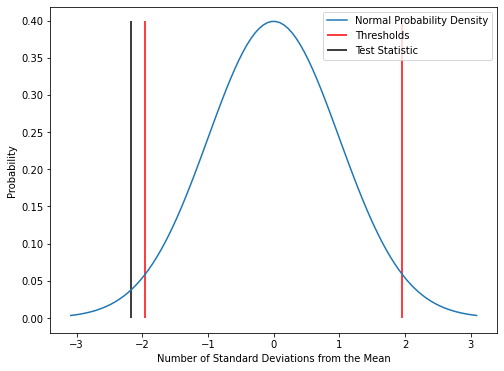

In [ ]:
plt.figure(figsize=(8,6))

# Getting our normal distribution PDF,
# as shown in an example in the scipy.stats.norm documentation
# Goes from the points at .1% to 99.9% 
x = np.linspace(stats.norm.ppf(0.001),
                stats.norm.ppf(0.999), 100)

# This plots the probability density curve, aka our bell curve
plt.plot(x, stats.norm.pdf(x), label="Normal Probability Density")

# Plotting our thresholds in red
plt.vlines(z_threshold_left, ymin=0, ymax=max(stats.norm.pdf(x)), color='red')
plt.vlines(z_threshold_right, ymin=0, ymax=max(stats.norm.pdf(x)), 
           color='red', label="Thresholds")

# Plotting our test statistic in black
plt.vlines(test_statistic, ymin=0, ymax=max(stats.norm.pdf(x)), 
           color='black', label="Test Statistic")

plt.ylabel('Probability')
plt.xlabel('Number of Standard Deviations from the Mean')
plt.legend()
plt.show()

Note how this black line is outside the bounds of our threshold - it is _more extreme_ than our threshold and thus you can reject the null hypothesis